
# Intro to SciPy
---

## Overview

* NumPy provides arrays and limited additional functionality


* SciPy builds on NumPy and provides additional modules:
  * Linear Algebra and wrappers to LAPACK & BLAS `scipy.linalg`
  * Numerical Integration `scipy.integrate`
  * Interpolation `scipy.interpolate`
  * Optimisation `scipy.optimize`
  * Special functions `scipy.special`
  * Signal processing `scipy.signal`
  * Image Processing `scipy.ndimage`
  * Fourier transforms `scipy.fftpack`
  * Statistical functions `stats`
  * Spatial data structures and algorithms `scipy.spatial`
  * File I/O e.g. to read MATLAB files `scipy.io`

* For now we focus on how to perform a fit with `scipy.optimize`


## Useful links

* Documentation:
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/tutorial/ </p>
  
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/ </p>
  
  * <p style="font-size: 100%"> http://scipy-cookbook.readthedocs.org </p>

# Fit with an arbitrary function
You can fit a certain distribution (histogram) with an arbitrary function. First let's import the needed modules:


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Now we will consider a set of x,y-data. This data has one independent variable (our x values) and one dependent variable (our y values). We will recast the data as numpy arrays, so we can use numpy features when we are evaluating our data. It is often very helpful to look at a plot of the data when deciding what functional form to fit.

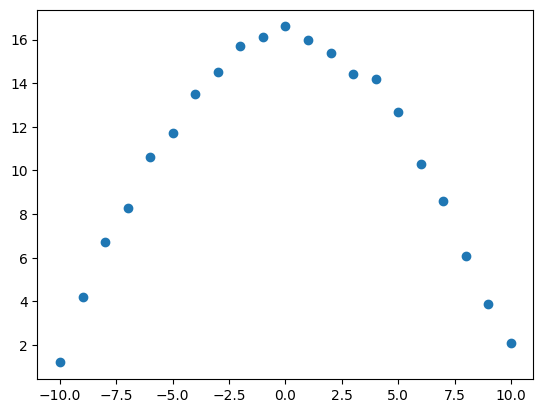

In [2]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')


This data could probably be fit to many functional forms. We will try two different functional forms. (Looking at data and knowing what function it might fit is non-trivial and beyond the scope of this lesson. For purposes of this lesson, we will simply fit the data to given functional forms.)

    Gaussian Function
    Cosine Function: D*cos(x)

### Gaussian function
First, let’s fit the data to the Gaussian function. Our goal is to find the values of A (normalization), sigma and x0 that best fit our data. First, we need to write a python function for the Gaussian function equation. The function should accept as inputs the independent variables (the x-values) and all the parameters that will be fit.

In [3]:
# Define the Gaussian function
def Gauss(x, A, x0, sigma):
    y = A/(sigma*np.sqrt(2*math.pi))*np.exp(-1*(x-x0)**2 / (2*sigma**2)) # this is the gaussian distribution
    return y


We will use the function **curve_fit** from the python module **scipy.optimize** to fit our data. It uses non-linear least squares to fit data to a functional form. You can learn more about curve_fit by using the help function within the Jupyter notebook or from the scipy online documentation.

The curve_fit function has three required inputs: the function you want to fit, the x-data, and the y-data you are fitting.
There are two outputs. The first is an array of the optimal values of the parameters. The second a matrix of the estimated covariance of the parameters from which you can calculate the standard error for the parameters.

In [4]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

The optimized values of A, sigma and x0 are now stored in the list parameters. From this, we can extract our best fit values of A and B and print them.

In [5]:
fit_A = parameters[0]
fit_x0 = parameters[1]
fit_sigma = parameters[2]
print(fit_A)
print(fit_x0)
print(fit_sigma)


239.24441923886332
0.050181761746842864
5.635922263441529


Now we want to see how well our fit equation matched our data. To do this, we will calculate the values of y, using our function and the fit values of A and B, and then we will make a plot to compare those calculated values to our data.

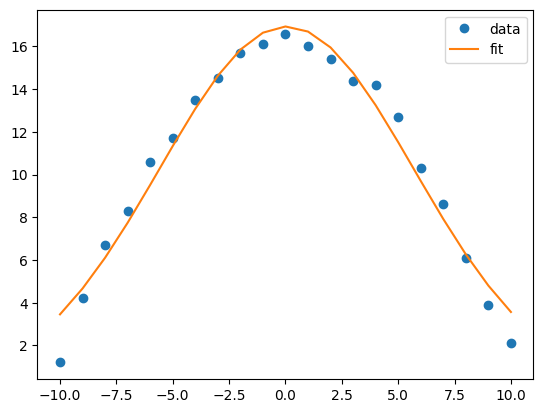

In [6]:
fit_y = Gauss(xdata, fit_A, fit_x0, fit_sigma) # we create our gaussian with the parameters we got from the scipy module
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()


Looks like a good fit!

To calculate the standard error of the parameters from the covariance, you take the square root of the diagonal elements of the matrix. You can do this in one line using functions from numpy.

In [7]:
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]

print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')


The value of A is 239.24442 with standard error of 5.43659.


### Cosine function
The cosine function proves to be a bit trickier. If we approach the problem as we do above, we see from the graph that we don’t get a good fit.

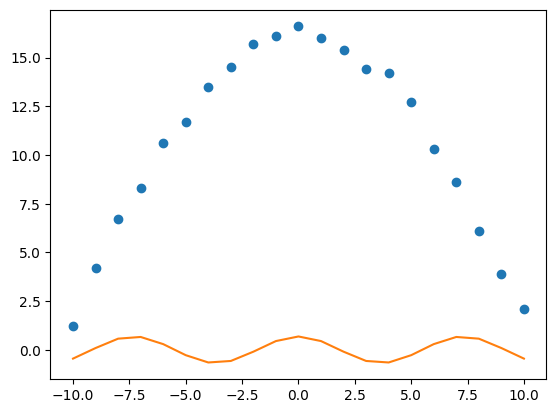

In [8]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')


To fix this, we need to give a guess for what we think our parameters are. Thinking about the form of the cosine function, the height of the function is controlled by the D parameter. Looking at our graph, it seems the value of D is somewhere between 15 and 17, so we will guess 16. Similarly, the E parameter tells us how many cycles occur over the 0 to 2 $\pi$ interval. This is a very wide graph; there is clearly much less than one cycle between 0 and 2 $\pi$, so we will guess that E is 0.1. To incorporate these guesses into our code, we will create a new array called guess. We then specify our guess when we call curve_fit.

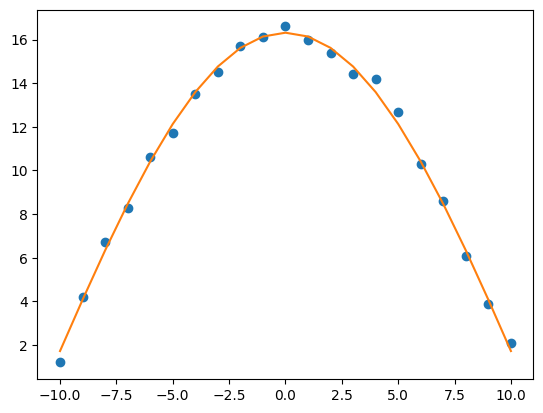

In [9]:
guess = [16, 0.1]
parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.savefig('03-cosine_fit2.png')


Now that looks like a good fit!

Frequently, you will have to adjust your guesses to get a good fit for your data. If you understand the physical significance of your data and the equation you are trying to fit, you will have an easier time fitting your data.
Now, you could compare the chi-squared values for the two fit to see which function better matches the dataset!